# Car Price Prediction Model 

In [710]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm

In [711]:
#IMPORTING DATASET
dataset = pd.read_csv('/home/bravin/Documents/Practice/Car-Price-Prediction-Challenge/car_price_prediction.csv',index_col=0)

#CHECKING DATASET
dataset.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
ID,,,,,,,,,,,,,,,,,
45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [712]:
#CHECKING DATASET SHAPE
dataset.shape

(19237, 17)

In [713]:
#CHECKING DATASET INFO
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19237 entries, 45654403 to 45813273
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Levy              19237 non-null  object 
 2   Manufacturer      19237 non-null  object 
 3   Model             19237 non-null  object 
 4   Prod. year        19237 non-null  int64  
 5   Category          19237 non-null  object 
 6   Leather interior  19237 non-null  object 
 7   Fuel type         19237 non-null  object 
 8   Engine volume     19237 non-null  object 
 9   Mileage           19237 non-null  object 
 10  Cylinders         19237 non-null  float64
 11  Gear box type     19237 non-null  object 
 12  Drive wheels      19237 non-null  object 
 13  Doors             19237 non-null  object 
 14  Wheel             19237 non-null  object 
 15  Color             19237 non-null  object 
 16  Airbags           19237 non-nu

# Data Cleaning 

In [714]:
# REMOVING KM FROM MILEAGE
dataset.Mileage = dataset.Mileage.str.replace('km','')

In [715]:
# CHANGING Prod Year to Date
dataset['Prod. year'] = pd.to_datetime(dataset['Prod. year'], format='%Y')

In [716]:
# Investgate Engine Volume 
dataset['Engine volume'].value_counts()

# REmove Turbo from Engine Volume
dataset['Engine volume'] = dataset['Engine volume'].str.replace('Turbo','')

# Convert Engine Volume to Float
dataset['Engine volume'] = dataset['Engine volume'].astype(float)

In [717]:
# Convert Mileage to Float
dataset['Mileage'] = dataset['Mileage'].astype(float)

In [718]:
# Replace '-' with NaN in Levy column
dataset['Levy'] = dataset['Levy'].replace('-', np.nan)

# Convert Levy to float
dataset['Levy'] = dataset['Levy'].astype(float)

# Fill NaN WITH 0
dataset['Levy'] = dataset['Levy'].fillna(0)


In [719]:
# Cleaning Door column from '04-May' to 4 and '02-Mar' to 2
dataset['Doors'] = dataset['Doors'].replace('04-May', 4).replace('02-Mar', 2).replace('>5', 5)

# Convering doors into object
dataset['Doors'] = dataset['Doors'].astype(object)


In [720]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19237 entries, 45654403 to 45813273
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Price             19237 non-null  int64         
 1   Levy              19237 non-null  float64       
 2   Manufacturer      19237 non-null  object        
 3   Model             19237 non-null  object        
 4   Prod. year        19237 non-null  datetime64[ns]
 5   Category          19237 non-null  object        
 6   Leather interior  19237 non-null  object        
 7   Fuel type         19237 non-null  object        
 8   Engine volume     19237 non-null  float64       
 9   Mileage           19237 non-null  float64       
 10  Cylinders         19237 non-null  float64       
 11  Gear box type     19237 non-null  object        
 12  Drive wheels      19237 non-null  object        
 13  Doors             19237 non-null  object        
 14  Wheel       

In [721]:
# CHecking for Duplicates in the dataset
dataset.duplicated().sum()

# CHecking columns with duplicates in the dataset
dataset[dataset.duplicated()]

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
ID,,,,,,,,,,,,,,,,,
45771040,314,1053.0,MERCEDES-BENZ,E 350,2014-01-01,Sedan,Yes,Diesel,3.5,149486.0,6.0,Automatic,4x4,4,Left wheel,Silver,12
45656681,2901,503.0,HONDA,Civic,2012-01-01,Sedan,Yes,Hybrid,1.5,146403.0,4.0,Automatic,Front,4,Left wheel,White,0
45771073,392,1017.0,MERCEDES-BENZ,E 300,2017-01-01,Sedan,Yes,Petrol,2.0,1600.0,4.0,Automatic,Rear,4,Left wheel,Black,12
45757416,282,289.0,FORD,Escape,2008-01-01,Jeep,Yes,Hybrid,0.4,220474.0,4.0,Automatic,Front,4,Left wheel,Grey,0
45764921,39829,1811.0,LEXUS,GX 460,2010-01-01,Jeep,Yes,Petrol,4.6,155821.0,8.0,Automatic,4x4,4,Left wheel,Black,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45732720,10036,639.0,HYUNDAI,Sonata,2014-01-01,Sedan,Yes,LPG,2.0,735970.0,4.0,Automatic,Front,4,Left wheel,Silver,4
45769427,29793,1053.0,MERCEDES-BENZ,E 350,2014-01-01,Sedan,Yes,Diesel,3.5,219030.0,6.0,Automatic,4x4,4,Left wheel,Black,12
45773726,706,1850.0,MERCEDES-BENZ,E 350,2008-01-01,Sedan,Yes,Diesel,3.5,122874.0,6.0,Automatic,Rear,4,Left wheel,Black,12


* The duplicates are not removed because they are different cars with the same name

In [722]:
# DESCRIBE DATASET
dataset.describe()

,Price,Levy,Engine volume,Mileage,Cylinders,Airbags
count,1.923700e+04,19237.000000,19237.000000,1.923700e+04,19237.000000,19237.000000
mean,1.855593e+04,632.528669,2.307990,1.532236e+06,4.582991,6.582627
std,1.905813e+05,567.721688,0.877805,4.840387e+07,1.199933,4.320168
min,1.000000e+00,0.000000,0.000000,0.000000e+00,1.000000,0.000000
25%,5.331000e+03,0.000000,1.800000,7.013900e+04,4.000000,4.000000
50%,1.317200e+04,642.000000,2.000000,1.260000e+05,4.000000,6.000000
75%,2.207500e+04,917.000000,2.500000,1.888880e+05,4.000000,12.000000
max,2.630750e+07,11714.000000,20.000000,2.147484e+09,16.000000,16.000000


# Data Visualization 

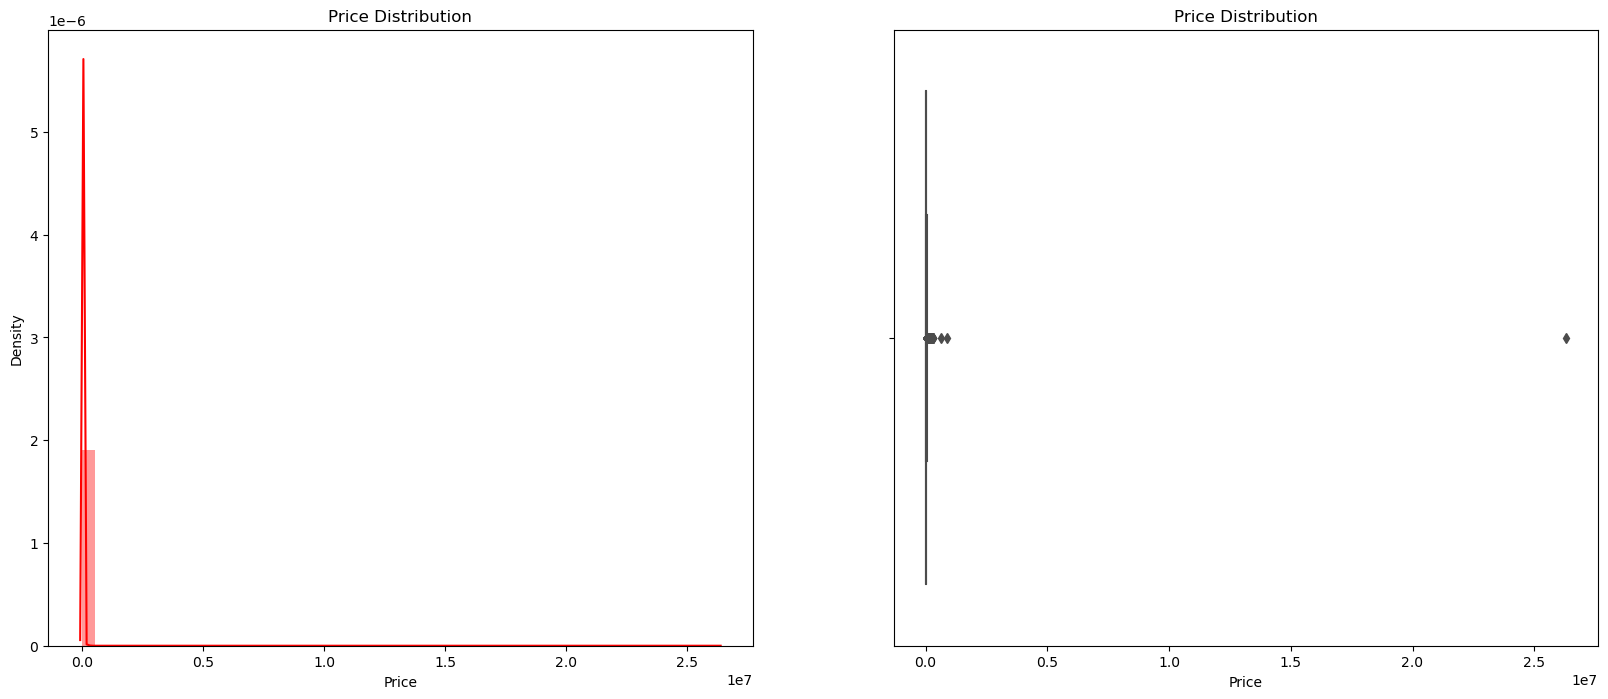

In [723]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.distplot(dataset['Price'], color='red')
plt.title('Price Distribution')

plt.subplot(1,2,2)
sns.boxplot(dataset['Price'], color='red')
plt.title('Price Distribution')

plt.show()

In [724]:
# CHeck for outliers in Price
dataset[dataset['Price'] > 600000]

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
ID,,,,,,,,,,,,,,,,,
45795524,627220,0.0,MERCEDES-BENZ,G 65 AMG 63AMG,2020-01-01,Jeep,Yes,Petrol,6.3,0.0,8.0,Tiptronic,4x4,4,Left wheel,Black,12
45761204,872946,2067.0,LAMBORGHINI,Urus,2019-01-01,Universal,Yes,Petrol,4.0,2531.0,8.0,Tiptronic,4x4,4,Left wheel,Black,0
45812886,26307500,0.0,OPEL,Combo,1999-01-01,Goods wagon,No,Diesel,1.7,99999.0,4.0,Manual,Front,2,Left wheel,Blue,0


In [725]:
# Removing outlier in price ID 45812886
dataset = dataset.drop(dataset[dataset['Price'] > 600000].index, axis=0)

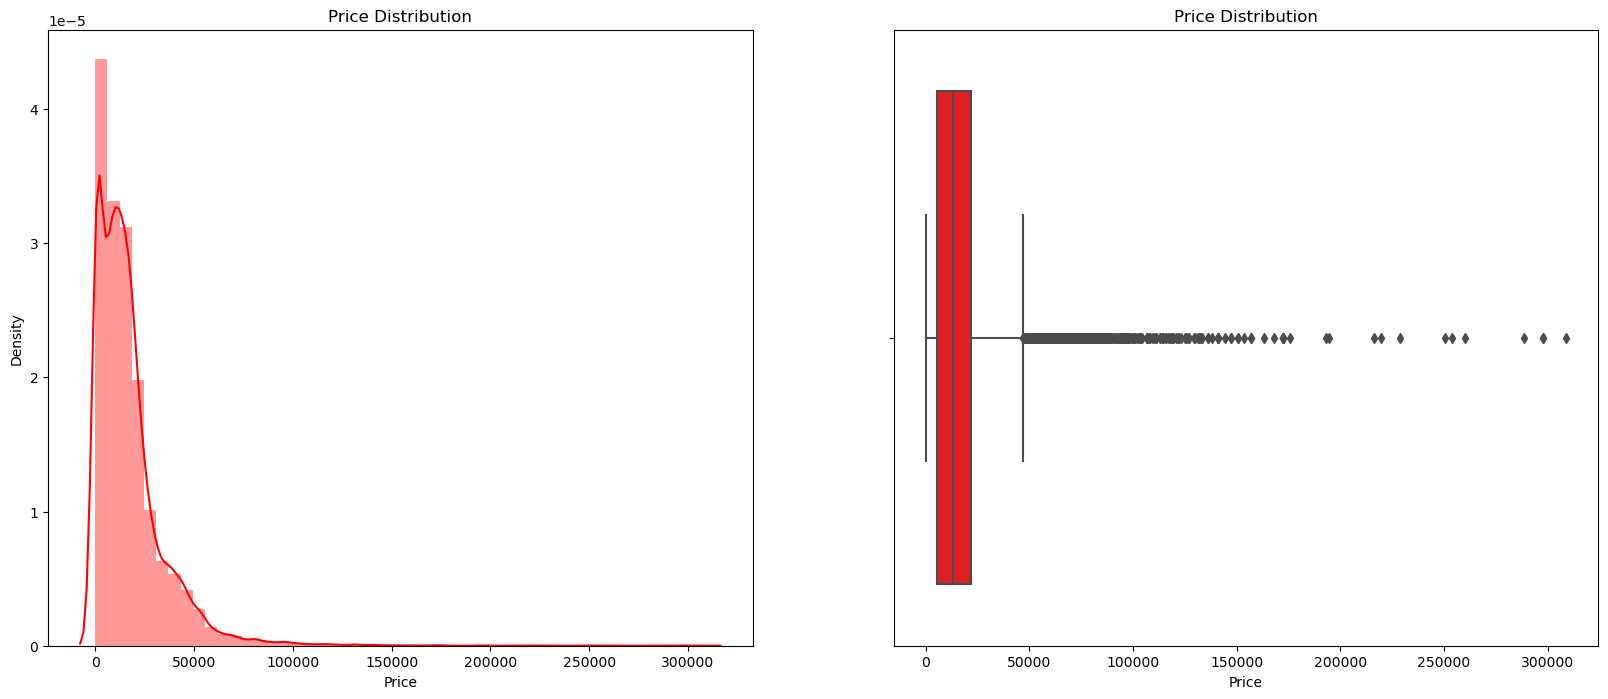

In [726]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.distplot(dataset['Price'], color='red')
plt.title('Price Distribution')

plt.subplot(1,2,2)
sns.boxplot(dataset['Price'], color='red')
plt.title('Price Distribution')

plt.show()

In [727]:
print(dataset.Price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count     19234.000000
mean      17113.065717
std       18278.647663
min           1.000000
25%        5331.000000
50%       13172.000000
75%       22063.000000
85%       30734.000000
90%       38574.000000
100%     308906.000000
max      308906.000000
Name: Price, dtype: float64


$Inference$
* The data is skwed to the right meaning most prices in the dataset are below ```$ 20,000```
* Their is a significant difference between the mean and the median.
* The data points are far spread out from the mean, which indicates a high variance in the car prices.(75% of the prices are below ```22,063```, whereas the remaining 15% are between ```30,734``` and ```308,906```.)

# Visualizing Categorical Variables 
* Manufacturer 
* Model 
* Category 
* Leather Interior 
* Fuel type 
* Gear box type 
* DRive wheels 
* Doors 
* Wheel 
* Color 

In [728]:
# Catetgorical/Object Features
cat_features = dataset.select_dtypes(include=['object']).columns
cat_features

Index(['Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type',
       'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color'],
      dtype='object')

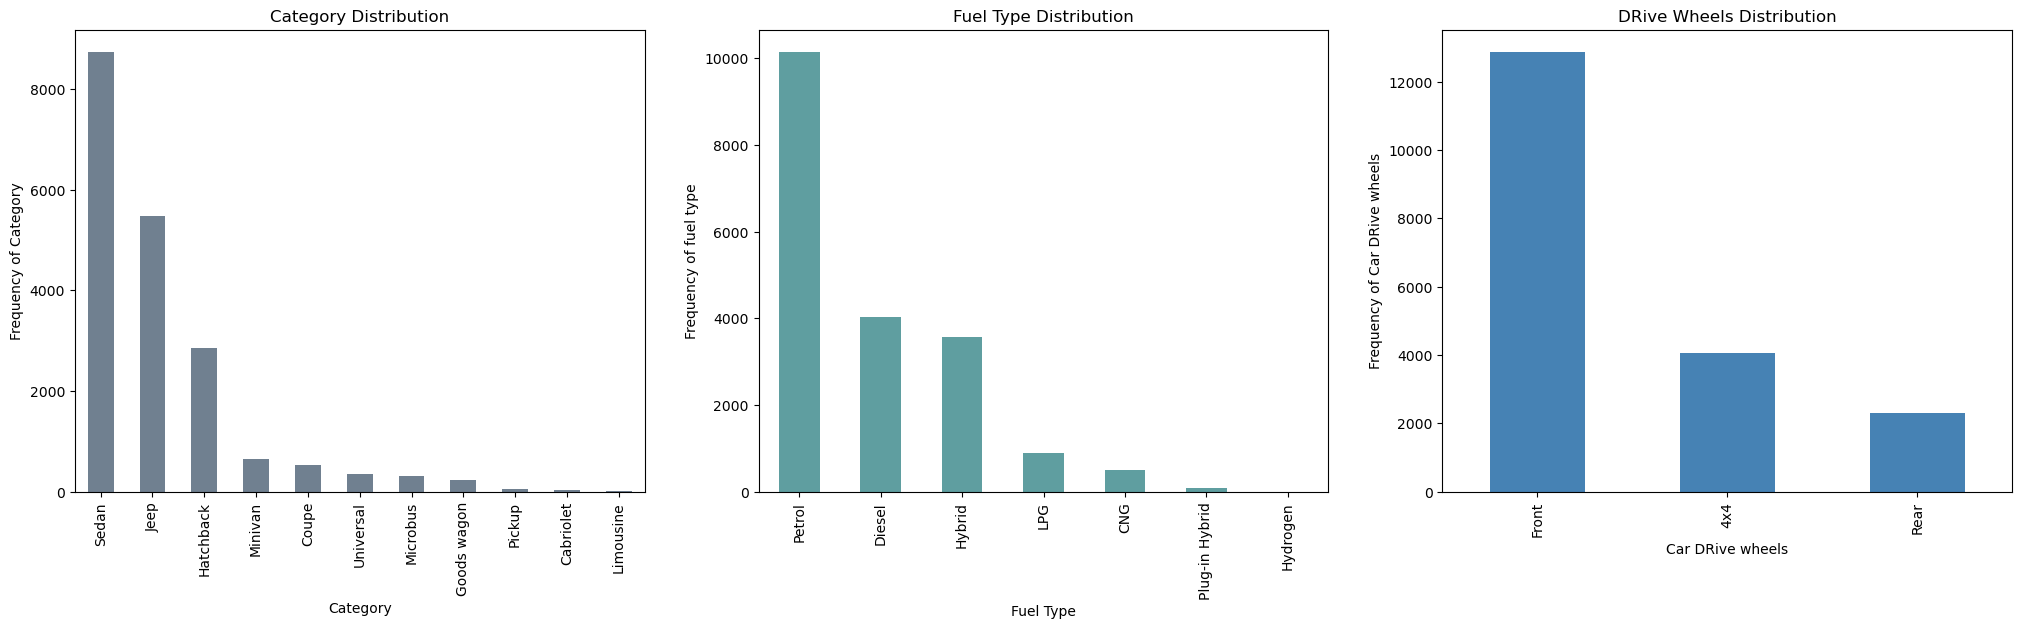

In [729]:
plt.figure(figsize=(25, 6))

plt.subplot(1, 3, 1)
plt1 = dataset.Category.value_counts().plot(kind='bar', color='slategrey')
plt.title('Category Distribution')
plt1.set(xlabel='Category', ylabel='Frequency of Category')

plt.subplot(1,3,2)
plt1 = dataset['Fuel type'].value_counts().plot(kind='bar', color='cadetblue')
plt.title('Fuel Type Distribution')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = dataset['Drive wheels'].value_counts().plot(kind='bar', color='steelblue')
plt.title('DRive Wheels Distribution')
plt1.set(xlabel = 'Car DRive wheels', ylabel='Frequency of Car DRive wheels')

plt.show()

$Inference$
* Sedan is the most purchased car while limousines are the least.
* Petrol fuel type car are mostly purchased.
* Frontdrive wheels are most purchased cars compaired ti rear drive wheels.

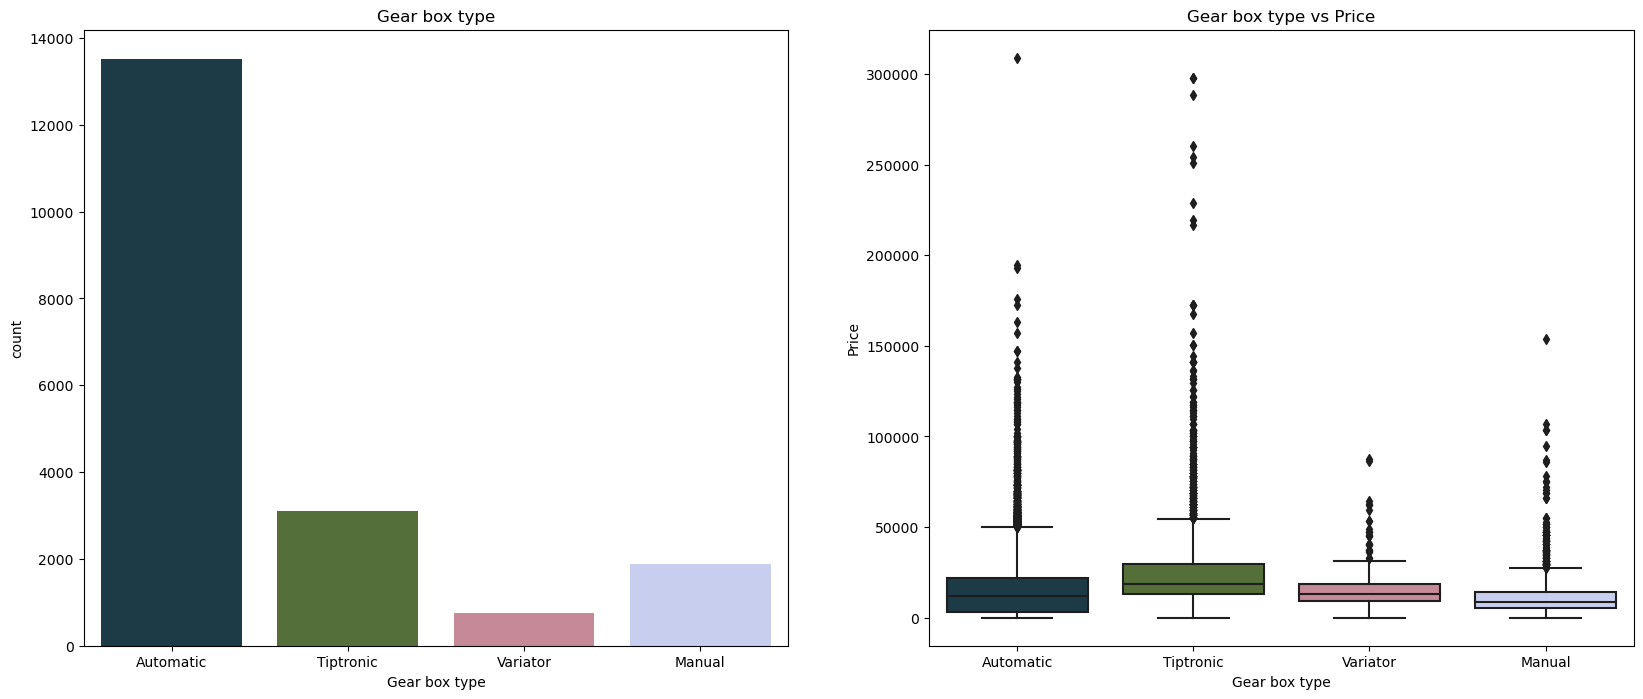

In [730]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Gear box type')
sns.countplot(dataset['Gear box type'], palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Gear box type vs Price')
sns.boxplot(x=dataset['Gear box type'], y=dataset.Price, palette=("cubehelix"))

plt.show()

$Inferences$
* Most Purchased Cars are automatic cars 
* Triptonic cars are most expensive cars 

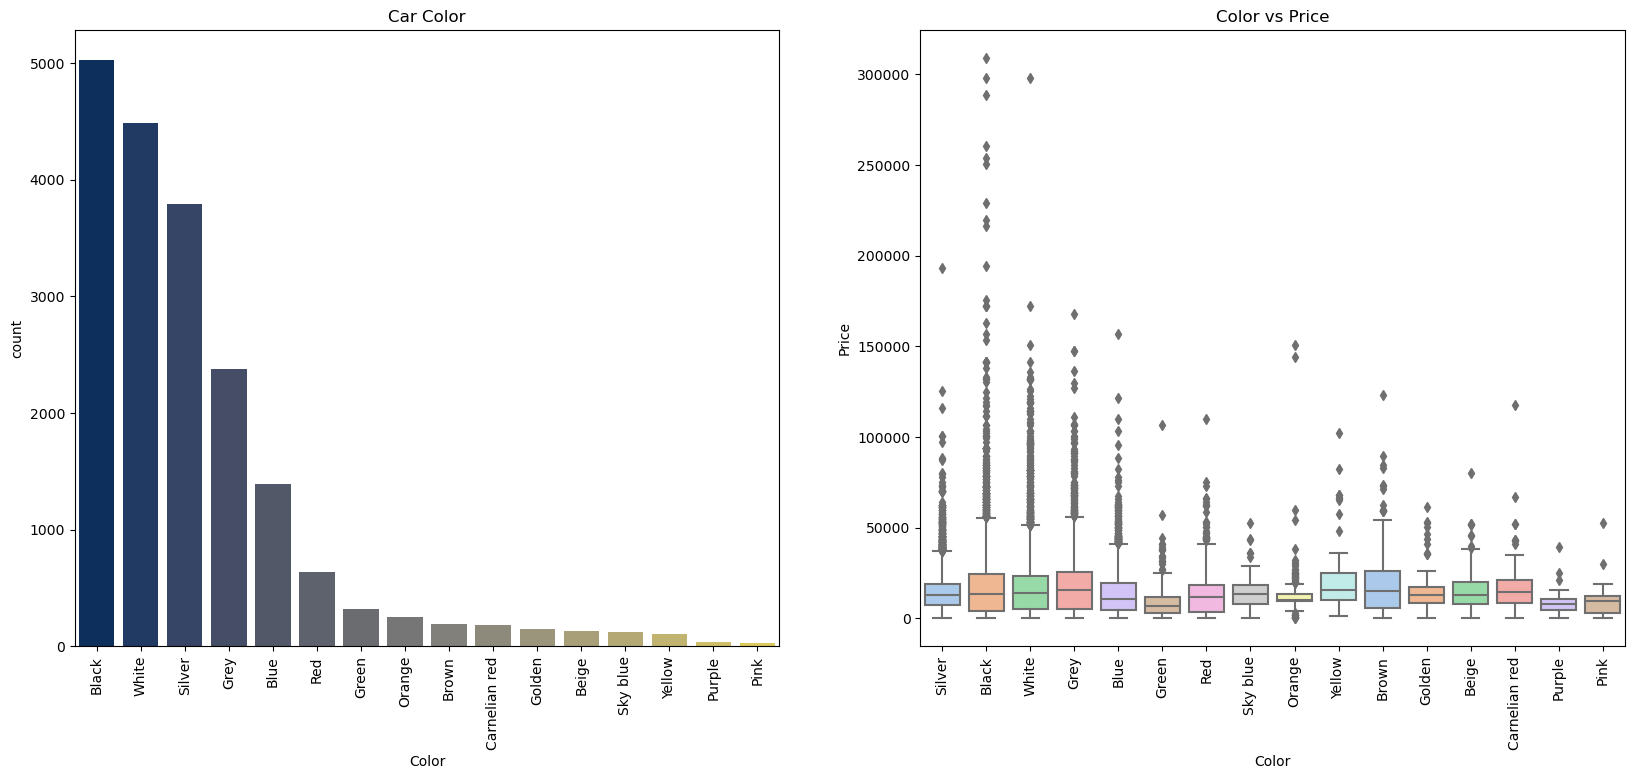

In [731]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Color')
sns.countplot(dataset['Color'], palette=("cividis"), order=dataset['Color'].value_counts().index)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title('Color vs Price')
sns.boxplot(x=dataset['Color'], y=dataset.Price, palette=("pastel"))
plt.xticks(rotation=90)

plt.show()

$Inference$
* Black cars are the most preffered cars and have a rellatively higher price compaired to the rest.
* Pink cars are the least preffered cars.

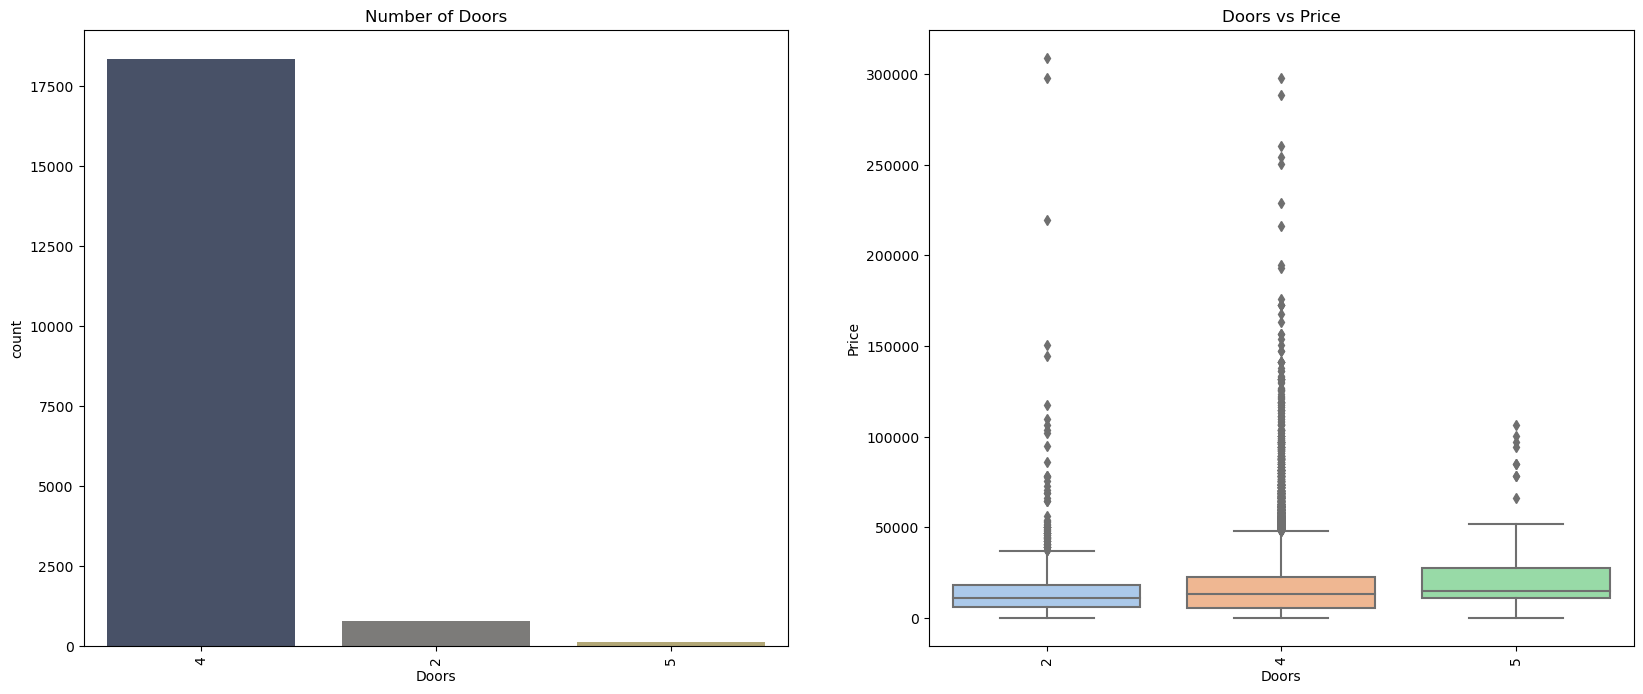

In [732]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Number of Doors')
sns.countplot(dataset['Doors'], palette=("cividis"), order=dataset['Doors'].value_counts().index)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title('Doors vs Price')
sns.boxplot(x=dataset['Doors'], y=dataset.Price, palette=("pastel"))
plt.xticks(rotation=90)

plt.show()

$Inference$
* Cars with ```4``` doors are most prefered and have relatively higher prices.

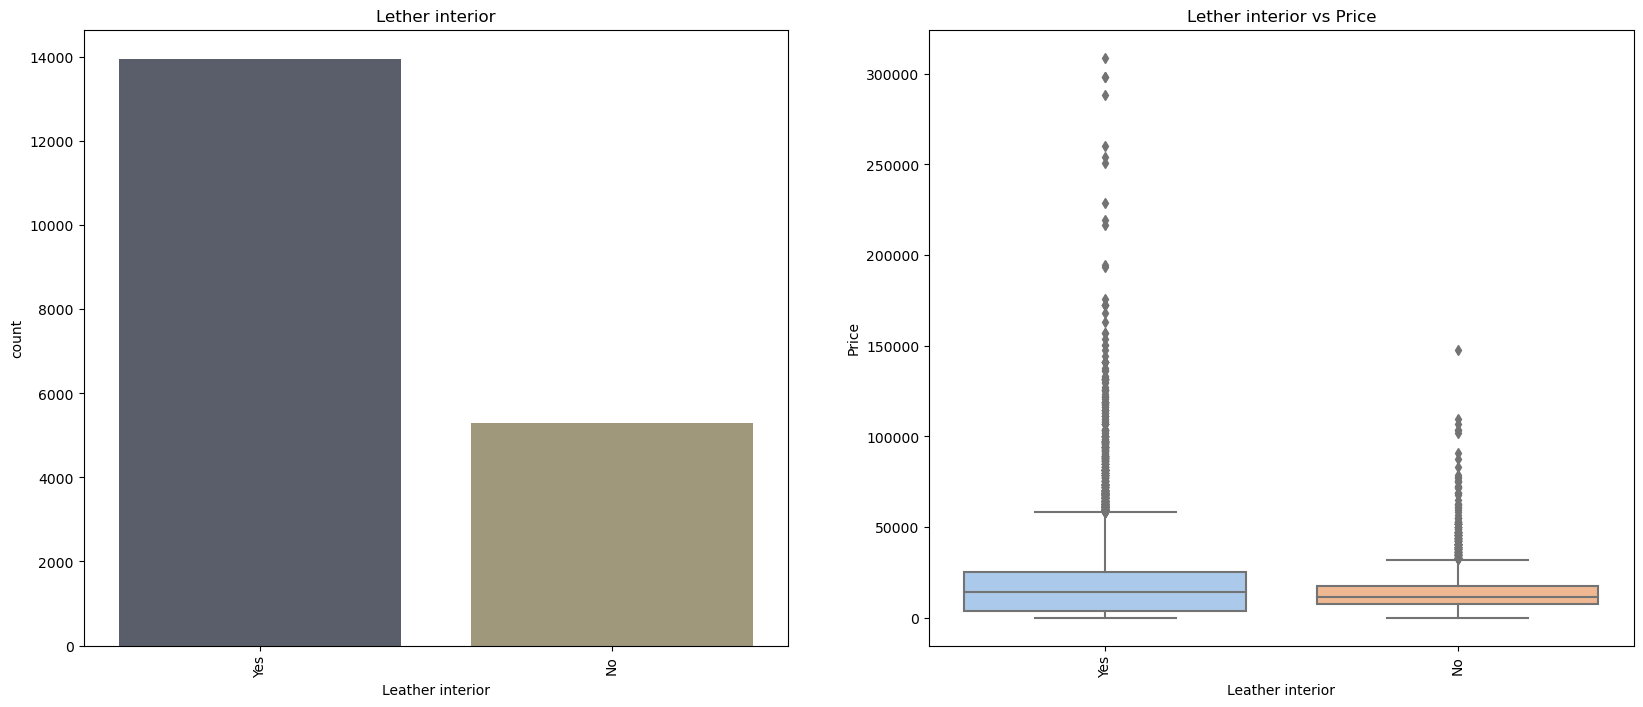

In [733]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Lether interior')
sns.countplot(dataset['Leather interior'], palette=("cividis"), order=dataset['Leather interior'].value_counts().index)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title('Lether interior vs Price')
sns.boxplot(x=dataset['Leather interior'], y=dataset.Price, palette=("pastel"))
plt.xticks(rotation=90)

plt.show()

$Inference$
* Most cars have Leather Interiors and fetch a higher price compared to those that dont.

# Visualizing Numeric Variables 

* Price 
* Levy
* Engine volume 
* Mileage
* Cylinders
* Airbags 

In [734]:
# function to plot distribution of numerical features
def plot_dist(df, col):
    plt.figure(figsize=(20,8))
    plt.subplot(1,2,1)
    sns.distplot(df[col], color='red')
    plt.title(col + ' Distribution')
    
    plt.subplot(1,2,2)
    sns.boxplot(df[col], color='red')
    plt.title(col + ' Distribution')
    
    plt.show()

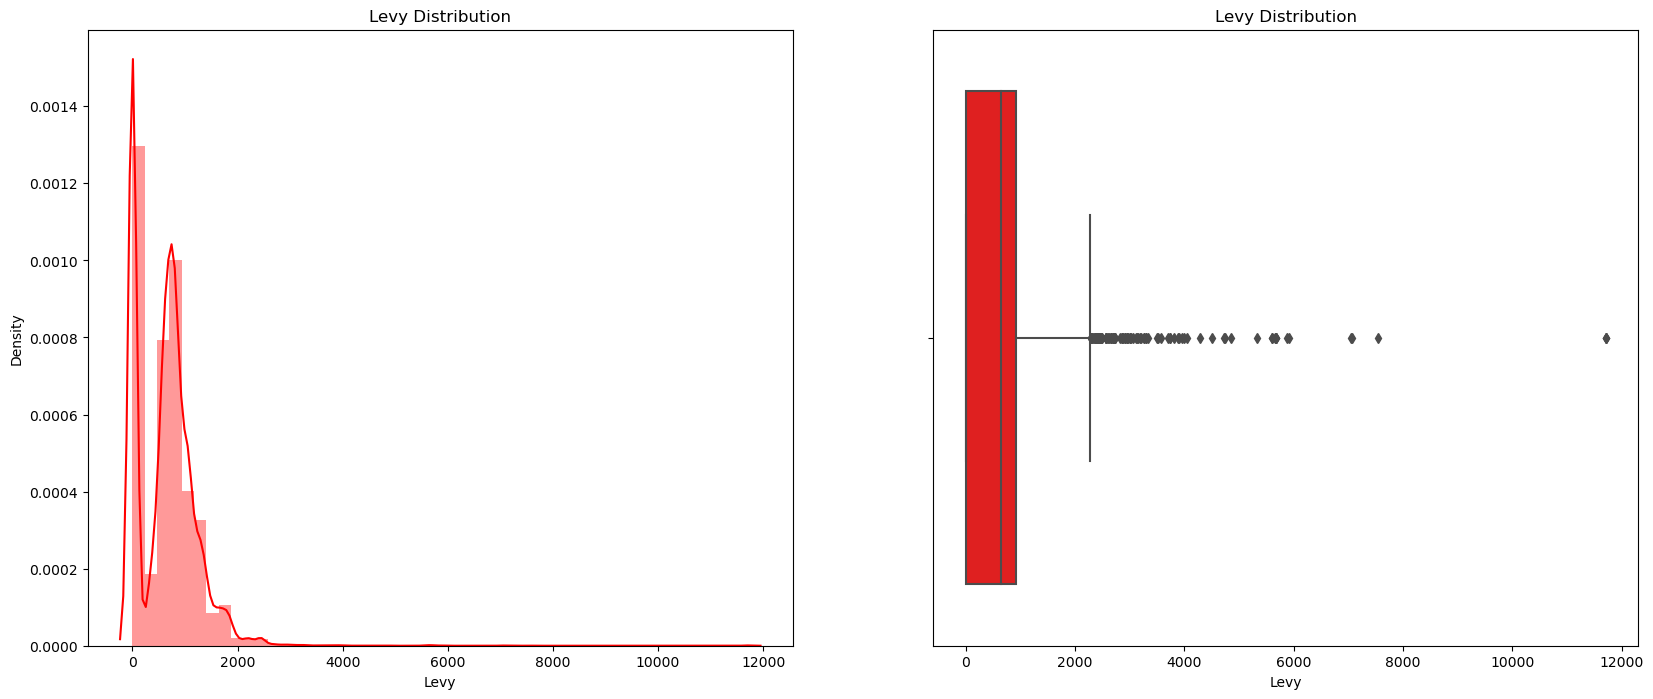

In [735]:
plot_dist(dataset, "Levy")

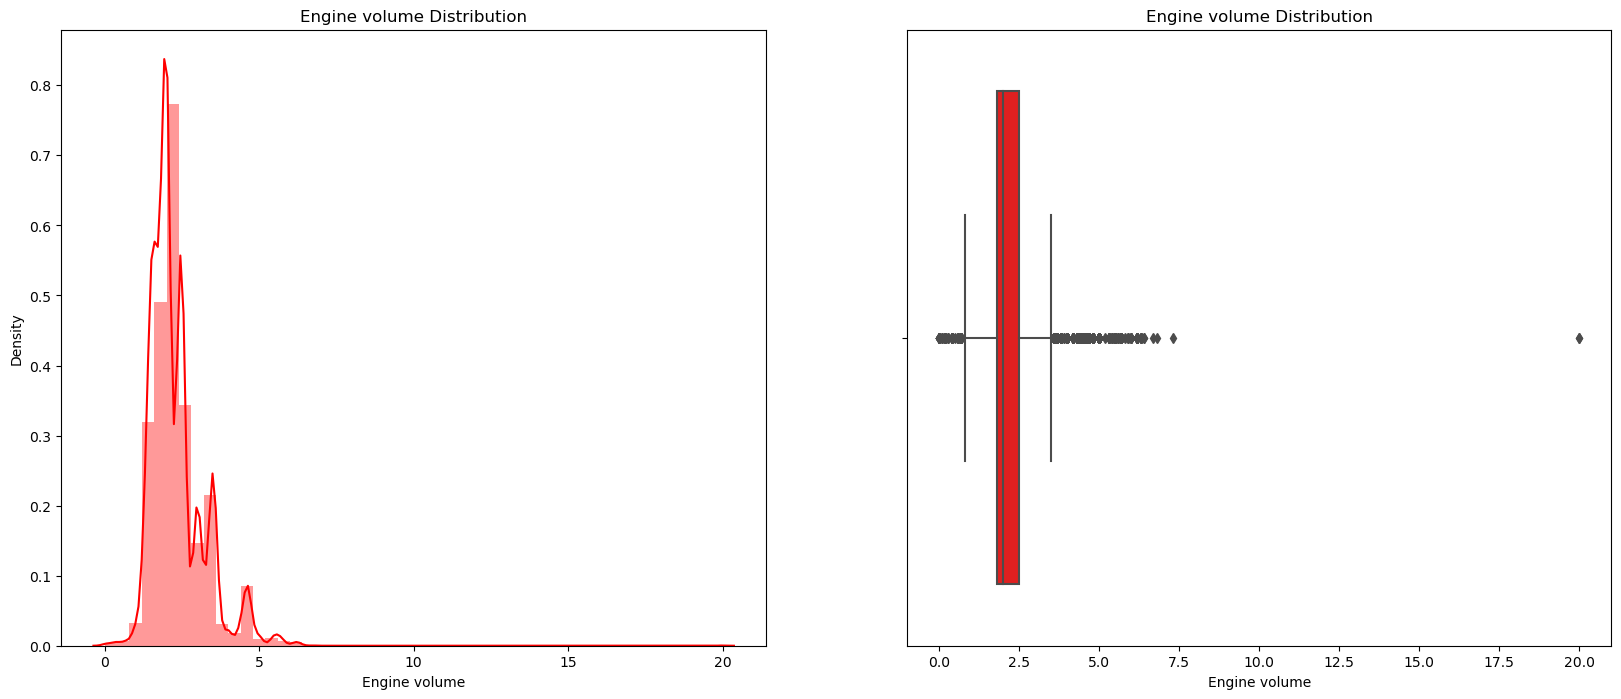

In [736]:
plot_dist(dataset, "Engine volume")

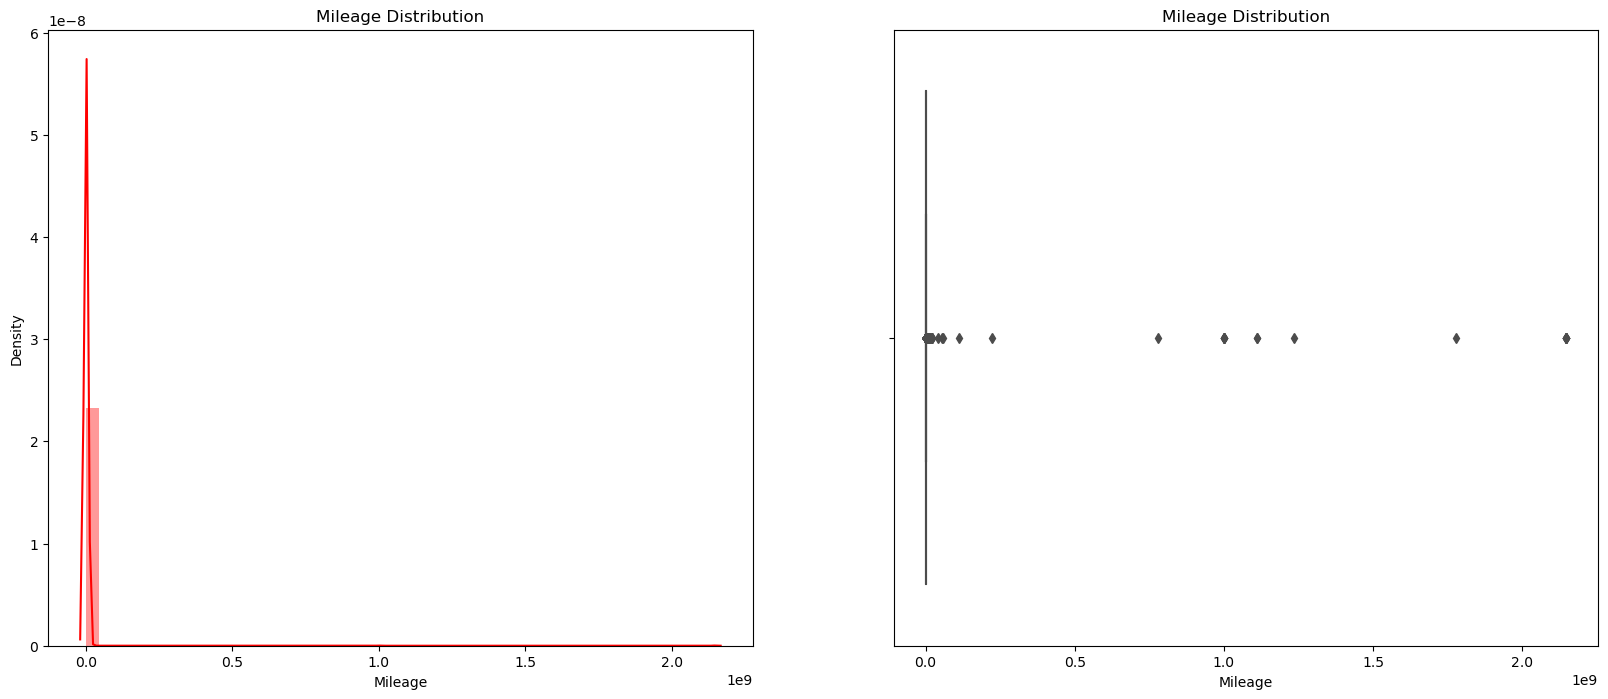

In [737]:
plot_dist(dataset, "Mileage")

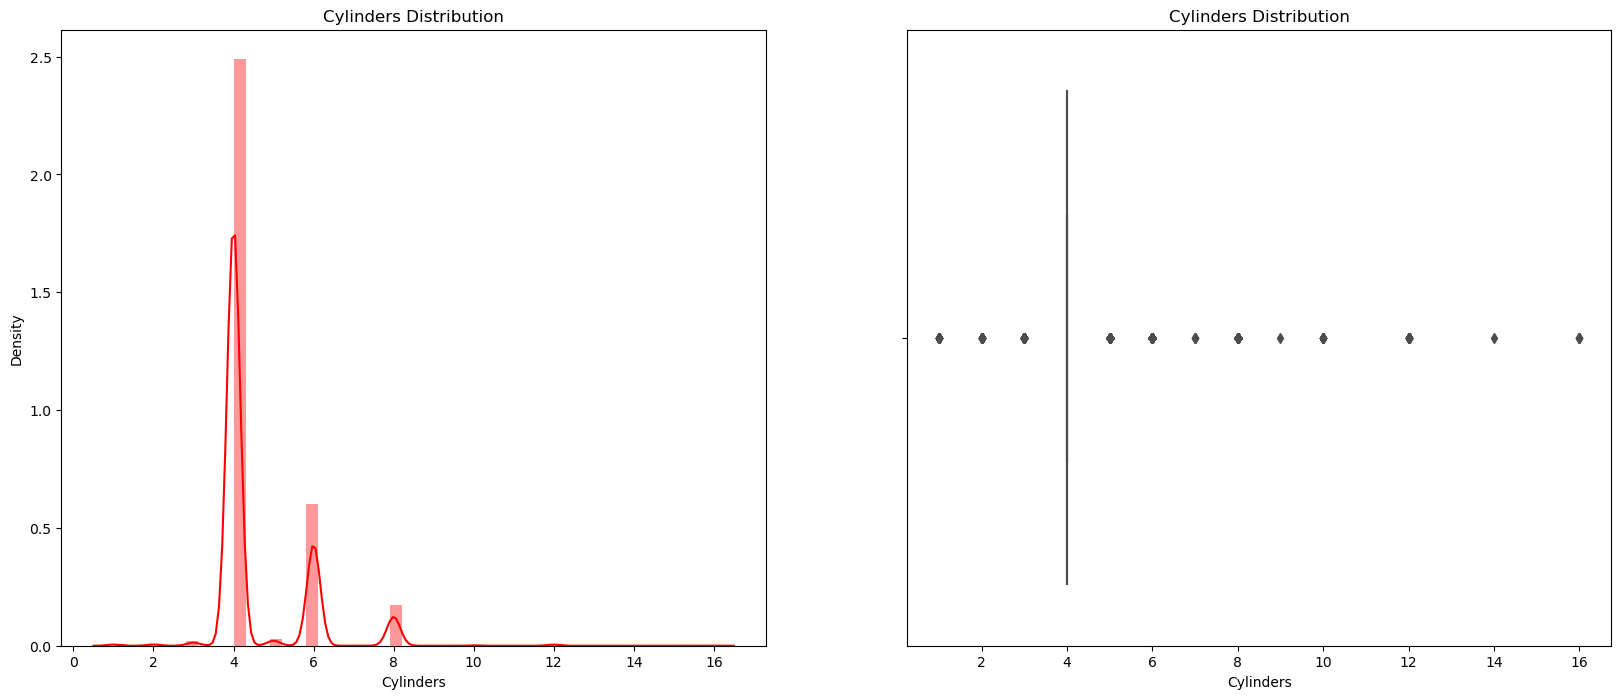

In [738]:
plot_dist(dataset, "Cylinders")

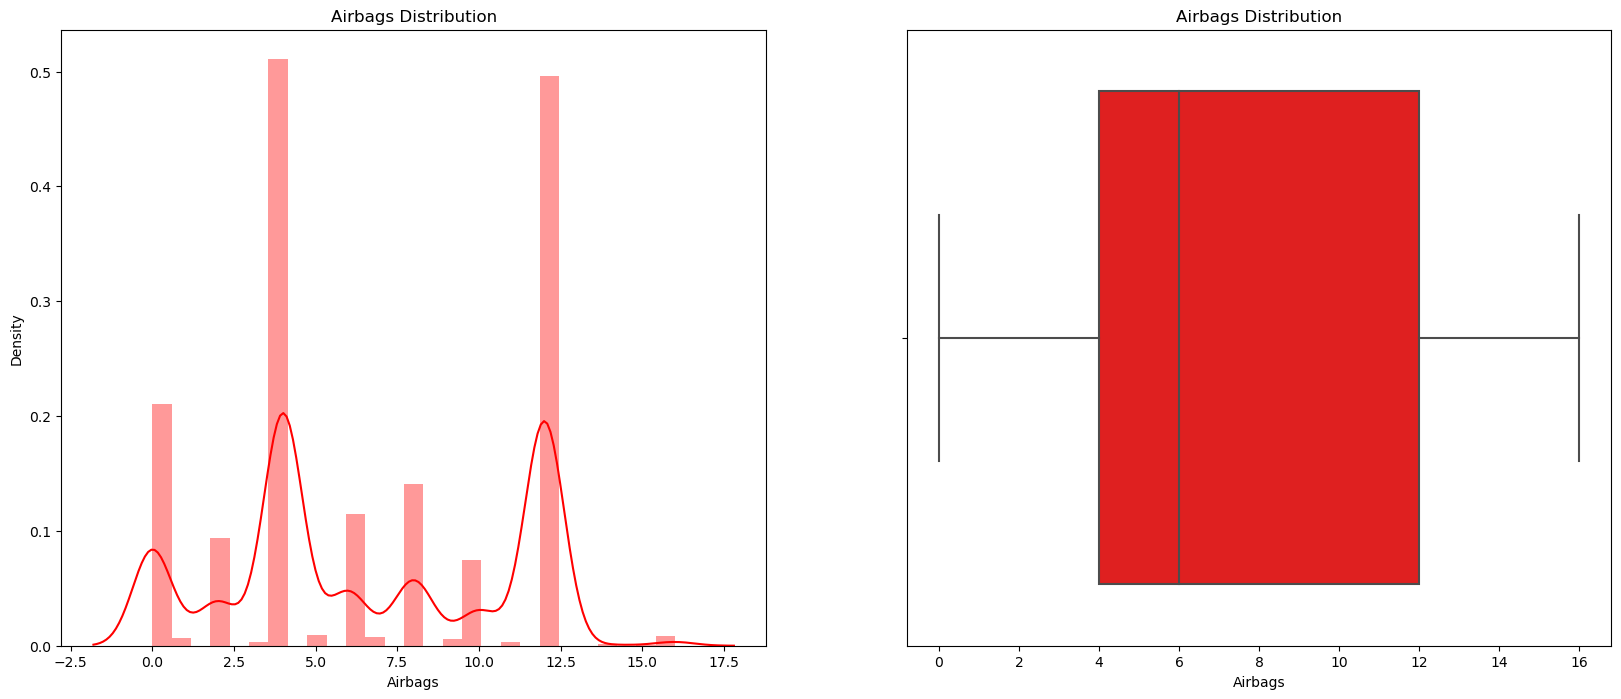

In [739]:
plot_dist(dataset, "Airbags")

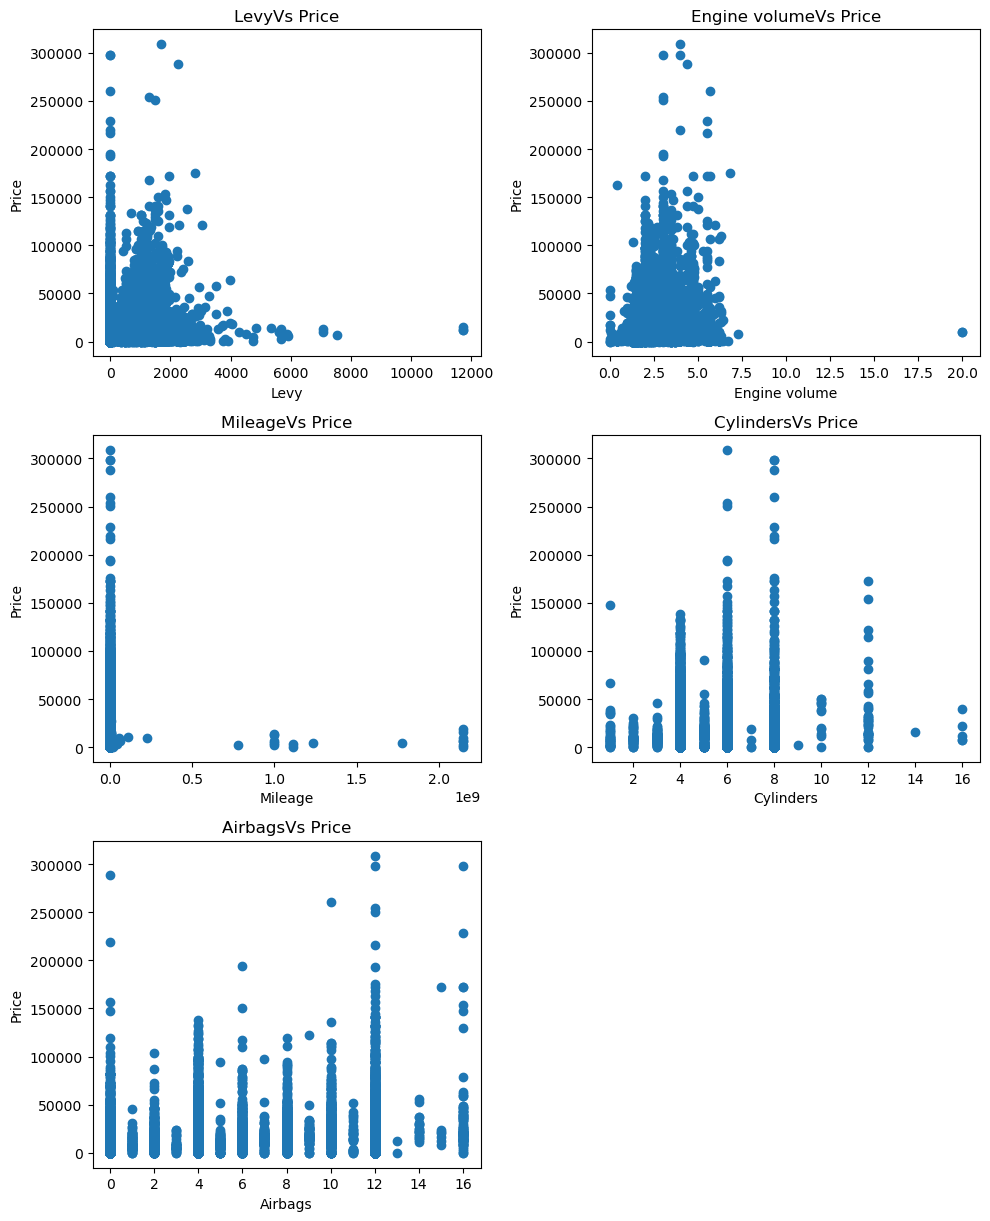

In [740]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(dataset[x],dataset['Price'])
    plt.title(x + 'Vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)


plt.figure(figsize=(10,20))
scatter('Levy',1)
scatter('Engine volume',2)
scatter('Mileage',3)
scatter('Cylinders',4)
scatter('Airbags',5)

plt.tight_layout()

$Inference$
* Levy, Engine Volume, Cylinders, Airbags have a significant correlation to Price.
* Their seems to be little correlation between Price and Mileage 

# New Features 
* ```Price per engine volume:``` The price per engine volume is calculated by dividing the price by the engine volume. This would allow you to compare the prices of different cars based on their engine size.

* ```Mileage per gallon:``` The mileage per gallon is calculated by dividing the mileage by the engine volume. This would allow you to compare the fuel efficiency of different cars based on their engine size.

* ```Levy adjusted for engine volume:``` The levy based on the engine volume of a car is calculated by dividing the Levy by the engine volume. This would account for the fact that larger engines typically produce more emissions and therefore may be subject to higher levies.

In [741]:
# price per engine volume 
dataset["Price per engine volume"] = dataset["Price"]/dataset["Engine volume"]

# Mileage per gallon 
dataset["Mileage per gallon"] = dataset["Mileage"]/dataset["Engine volume"]

# Levy per engine volume
dataset["Levy per engine volume"] = dataset["Levy"]/dataset["Engine volume"]

In [742]:
dataset.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price per engine volume,Mileage per gallon,Levy per engine volume
ID,,,,,,,,,,,,,,,,,,,,
45654403,13328,1399.0,LEXUS,RX 450,2010-01-01,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,4,Left wheel,Silver,12,3808.000000,53144.285714,399.714286
44731507,16621,1018.0,CHEVROLET,Equinox,2011-01-01,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,4,Left wheel,Black,8,5540.333333,64000.000000,339.333333
45774419,8467,0.0,HONDA,FIT,2006-01-01,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,4,Right-hand drive,Black,2,6513.076923,153846.153846,0.000000
45769185,3607,862.0,FORD,Escape,2011-01-01,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,4,Left wheel,White,0,1442.800000,67586.400000,344.800000
45809263,11726,446.0,HONDA,FIT,2014-01-01,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,4,Left wheel,Silver,4,9020.000000,70693.076923,343.076923


# Bivariate Analysis 

In [743]:
# function for bivariate analysis for new features
def plot_scatter(df, col):
    plt.figure(figsize=(20,8))
    plt.subplot(1,2,1)
    sns.scatterplot(df[col], df['Price'], color='tomato')
    plt.title(col + ' vs Price')
    
    plt.subplot(1,2,2)
    sns.boxplot(df[col], color='tomato')
    plt.title(col + ' vs Price')
    
    plt.show()

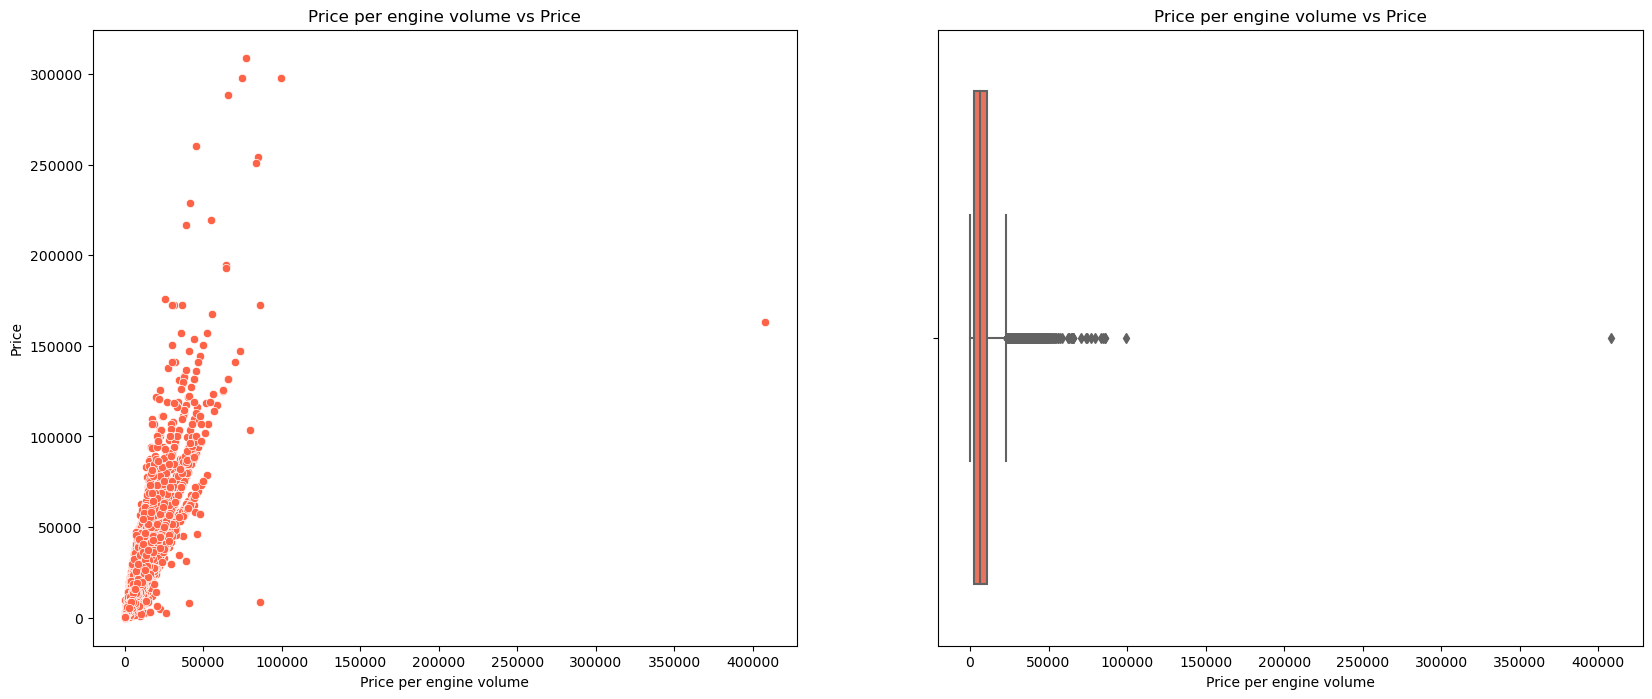

In [744]:
plot_scatter(dataset, "Price per engine volume")

In [745]:
# removing outliers in Price per engine volume
dataset = dataset.drop(dataset[dataset['Price per engine volume'] > 100000].index, axis=0)

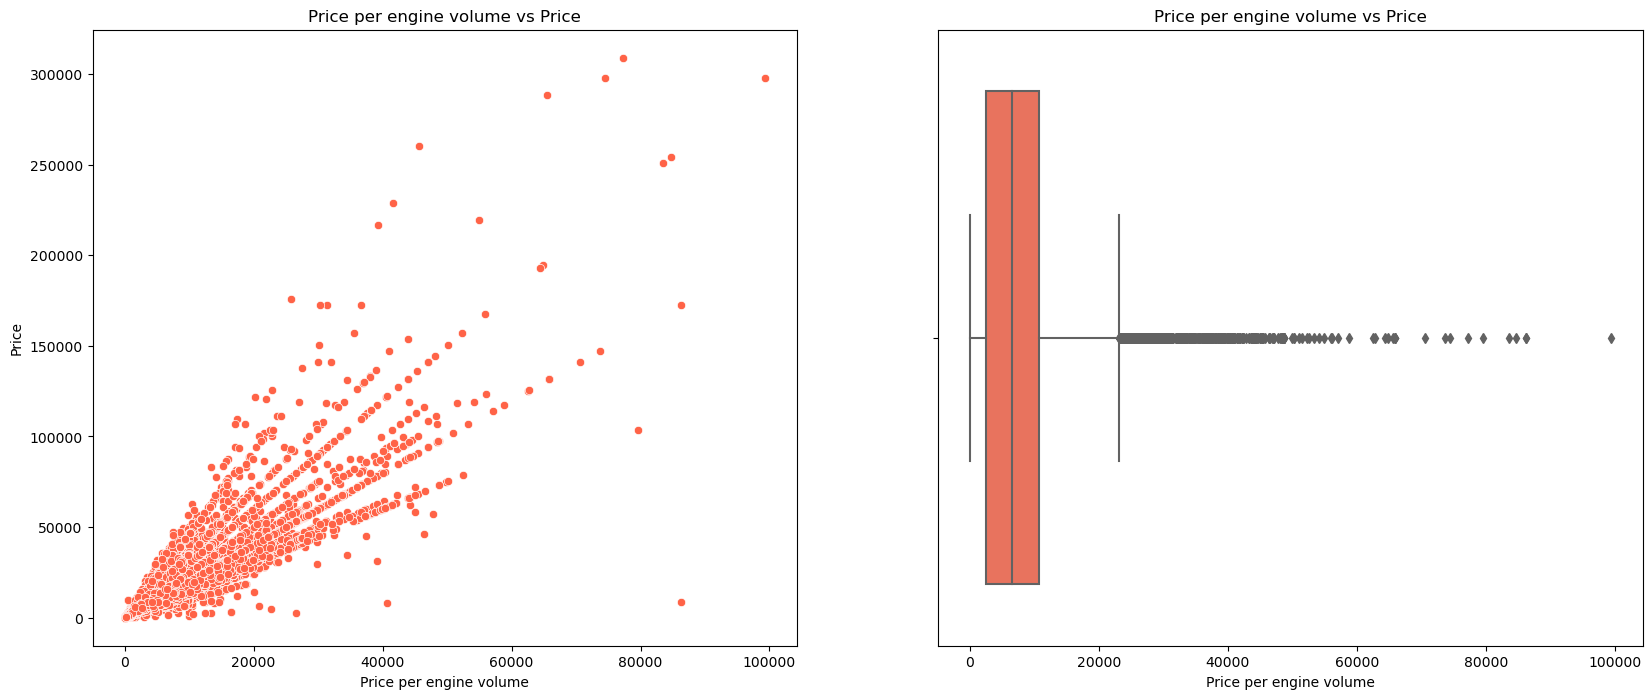

In [746]:
plot_scatter(dataset, "Price per engine volume")

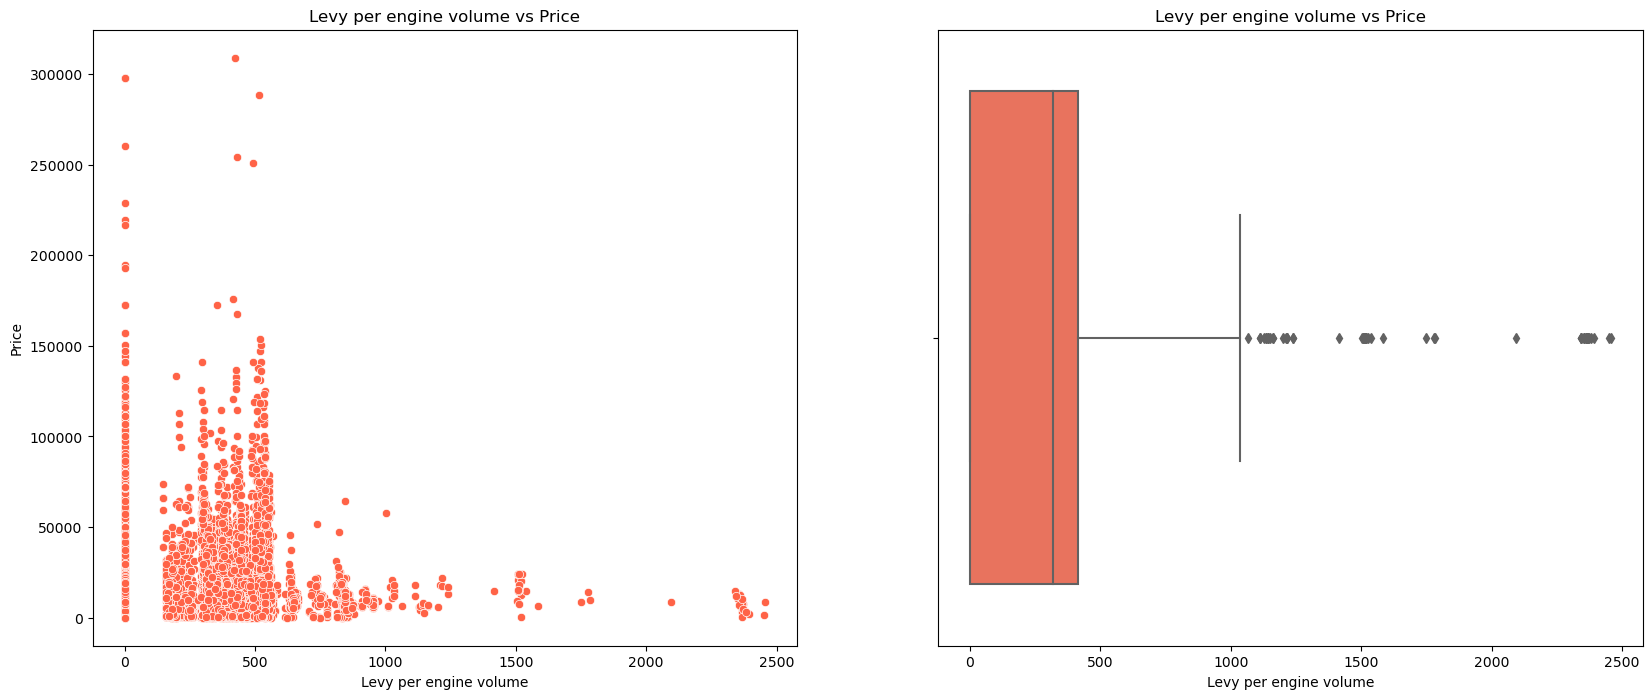

In [747]:
plot_scatter(dataset, "Levy per engine volume")

In [748]:
# removing outliers in Levy per engine volume
dataset = dataset.drop(dataset[dataset['Levy per engine volume'] > 1000].index, axis=0)

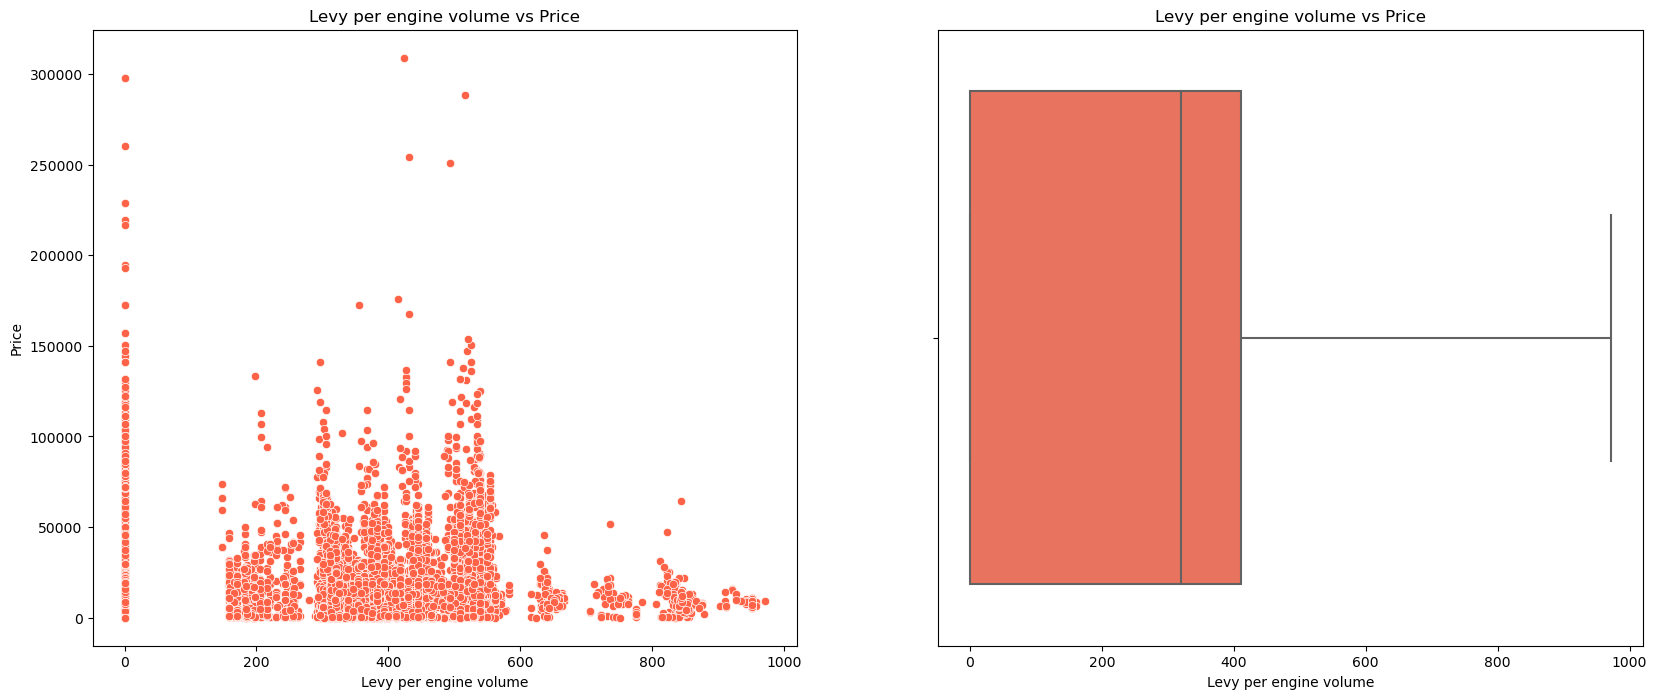

In [749]:
plot_scatter(dataset, "Levy per engine volume")

In [750]:
# Numerical Features
num_features = dataset.select_dtypes(include=['int64', 'float64']).columns
num_features

Index(['Price', 'Levy', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags',
       'Price per engine volume', 'Mileage per gallon',
       'Levy per engine volume'],
      dtype='object')

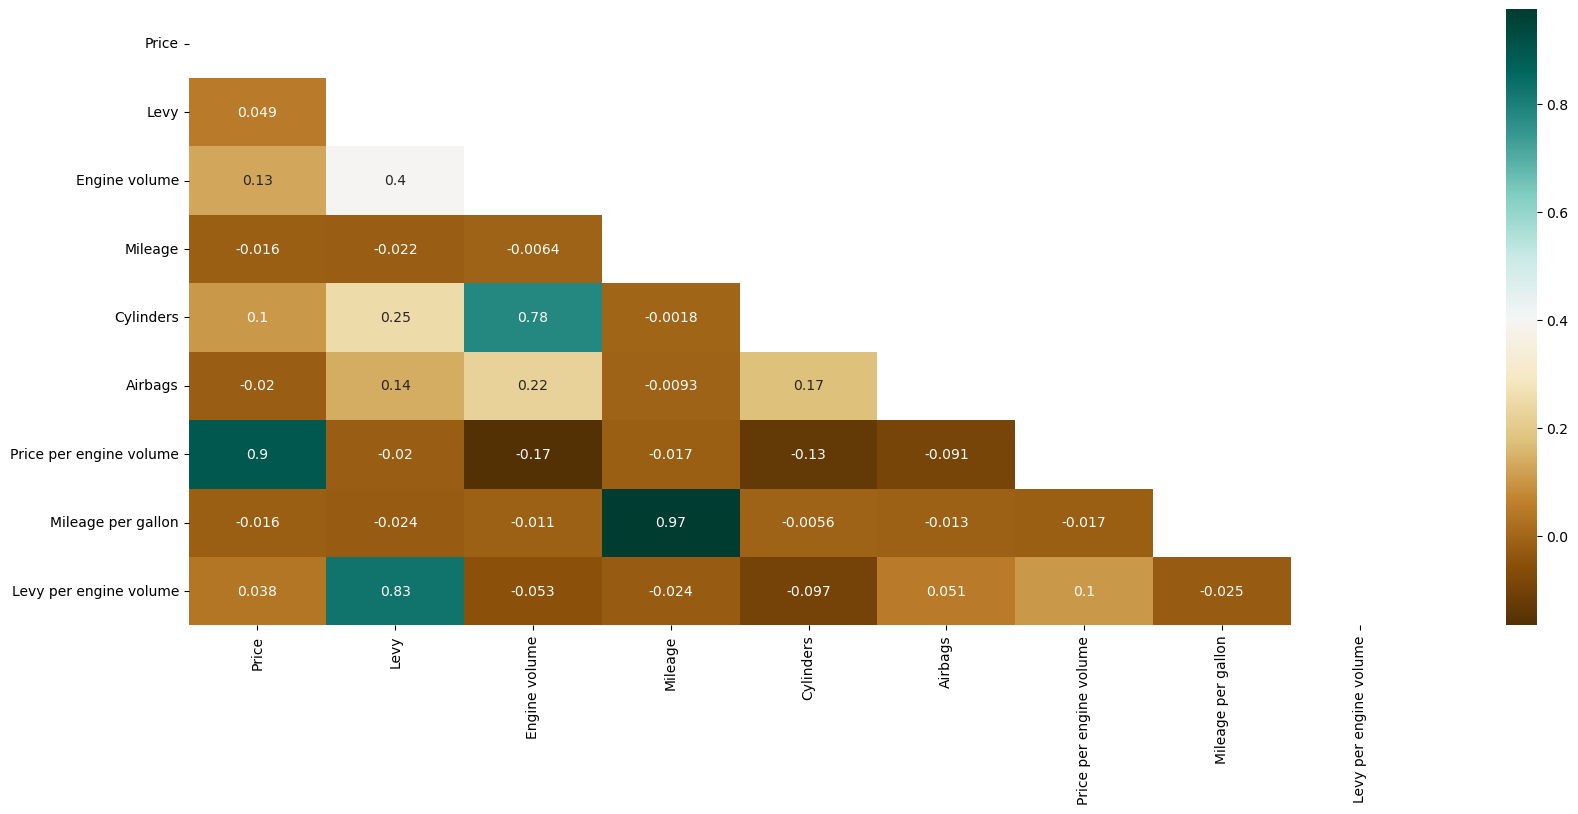

In [751]:
# Correlation between numerical features upper triangle
corr = dataset[num_features].corr()
plt.figure(figsize=(20,8))
sns.heatmap(corr, annot=True, cmap='BrBG', mask=np.triu(corr))
plt.show()

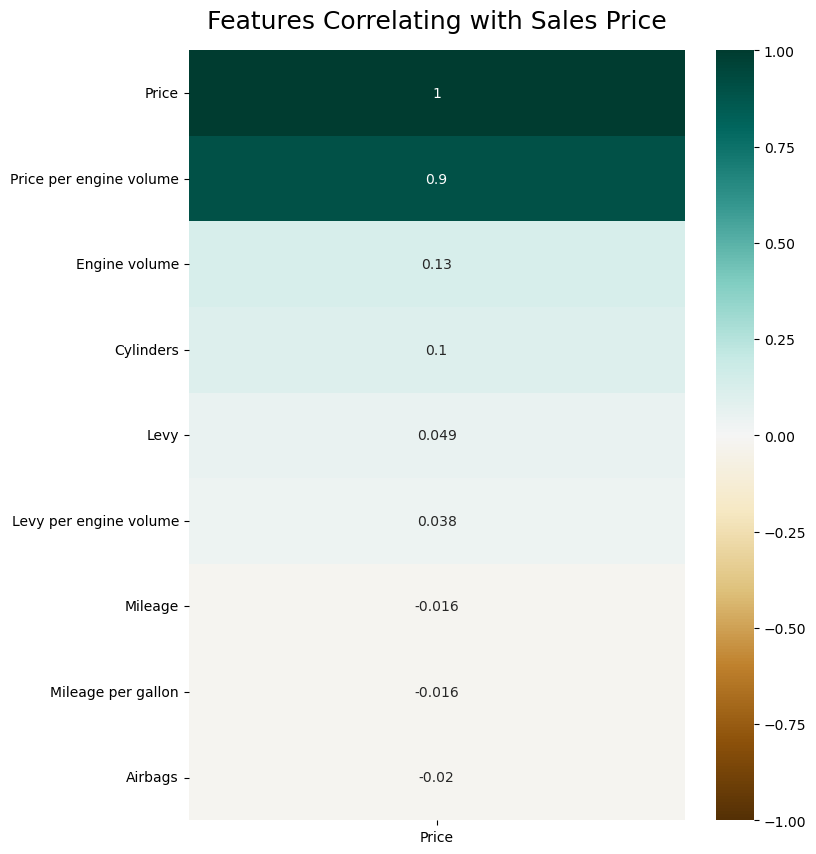

In [752]:
# visualizing our base model correlation Features
plt.figure(figsize=(8, 10))
heatmap = sns.heatmap(dataset[num_features].corr()[['Price']].sort_values(by='Price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16);

$Multicollinearity Features$
* THe Following Variables have high multivollinearity *Cylinders*, *Levy*, *Mileage*, *Levy per engine volume*, *Mileage per gallon*, *Engine volume*, *price per engine volume*

In [753]:
base_features = dataset[['Price per engine volume', 'Levy per engine volume', 'Mileage per gallon', 'Levy', 'Cylinders', 'Airbags']]

# MODELING

### Significant Variables 
* Levy
* Engine volume
* Mileage
* Cylinders 
* Airbags 
* Mileage per gallon
* Levy per engine volume 

#### MODEL 1 

In [754]:
base_features = dataset[['Levy per engine volume', 'Mileage per gallon', 'Engine volume', 'Airbags']]

In [755]:
X = base_features
y = dataset['Price']

In [756]:
# function to perform OLS regression
def ols_regression(X, y):
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    print(model.summary())
    return model

In [757]:
ols_regression(X, y)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     109.2
Date:                Mon, 24 Apr 2023   Prob (F-statistic):           3.20e-92
Time:                        20:44:24   Log-Likelihood:            -2.1492e+05
No. Observations:               19154   AIC:                         4.299e+05
Df Residuals:                   19149   BIC:                         4.299e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   1.04

In [758]:
# drop Levy 

# X = X.drop(['Mileage per gallon'], axis=1)

In [759]:
# object features
obj_features = dataset.select_dtypes(include=['object']).columns
obj_features

Index(['Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type',
       'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color'],
      dtype='object')

In [760]:
# selected dummy features
dummy_features = ['Manufacturer', 'Category', 'Leather interior', 'Fuel type', 'Color', 'Doors']


In [761]:
# SELECTED FEATURES
selected_features2 = dataset[['Price','Levy per engine volume', 'Mileage per gallon', 'Engine volume', 'Airbags', 'Manufacturer', 'Category', 'Leather interior', 'Fuel type', 'Color', 'Doors']]

selected_features2.head()

,Price,Levy per engine volume,Mileage per gallon,Engine volume,Airbags,Manufacturer,Category,Leather interior,Fuel type,Color,Doors
ID,,,,,,,,,,,
45654403,13328,399.714286,53144.285714,3.5,12,LEXUS,Jeep,Yes,Hybrid,Silver,4
44731507,16621,339.333333,64000.000000,3.0,8,CHEVROLET,Jeep,No,Petrol,Black,4
45774419,8467,0.000000,153846.153846,1.3,2,HONDA,Hatchback,No,Petrol,Black,4
45769185,3607,344.800000,67586.400000,2.5,0,FORD,Jeep,Yes,Hybrid,White,4
45809263,11726,343.076923,70693.076923,1.3,4,HONDA,Hatchback,Yes,Petrol,Silver,4


In [762]:
# dummy encoding and dropping columns with high cardinality
selected_features2 = pd.get_dummies(selected_features2, columns=dummy_features, drop_first=True)
selected_features2.head()

,Price,Levy per engine volume,Mileage per gallon,Engine volume,Airbags,Manufacturer_ALFA ROMEO,Manufacturer_ASTON MARTIN,Manufacturer_AUDI,Manufacturer_BENTLEY,Manufacturer_BMW,...,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow,Doors_4,Doors_5
ID,,,,,,,,,,,,,,,,,,,,,
45654403,13328,399.714286,53144.285714,3.5,12,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
44731507,16621,339.333333,64000.000000,3.0,8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
45774419,8467,0.000000,153846.153846,1.3,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
45769185,3607,344.800000,67586.400000,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
45809263,11726,343.076923,70693.076923,1.3,4,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [763]:
# splitting data into train and test
X = selected_features2.drop(['Price'], axis=1)
y = selected_features2['Price']

ols_regression(X, y)


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     41.34
Date:                Mon, 24 Apr 2023   Prob (F-statistic):               0.00
Time:                        20:44:25   Log-Likelihood:            -2.1326e+05
No. Observations:               19154   AIC:                         4.267e+05
Df Residuals:                   19053   BIC:                         4.275e+05
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [764]:
# Checking for Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                            for i in range(len(X.columns))]

vif_data




,feature,VIF
0,Levy per engine volume,3.590767
1,Mileage per gallon,1.013901
2,Engine volume,15.751403
3,Airbags,4.553812
4,Manufacturer_ALFA ROMEO,1.100062
...,...,...
95,Color_Sky blue,1.867008
96,Color_White,32.719415
97,Color_Yellow,1.773302
98,Doors_4,43.049561


In [765]:
# checking values with high VIF
vfi_high = vif_data[vif_data['VIF'] > 10]

# dropping features with high VIF
X = X.drop(vfi_high['feature'], axis=1)


In [766]:
ols_regression(X, y)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     29.26
Date:                Mon, 24 Apr 2023   Prob (F-statistic):               0.00
Time:                        20:44:46   Log-Likelihood:            -2.1412e+05
No. Observations:               19154   AIC:                         4.284e+05
Df Residuals:                   19080   BIC:                         4.290e+05
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [767]:
# checking values with high p-values
p_high = ols_regression(X, y).pvalues[ols_regression(X, y).pvalues > 0.05]

# dropping features with high p-values
X = X.drop(p_high.index, axis=1)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     29.26
Date:                Mon, 24 Apr 2023   Prob (F-statistic):               0.00
Time:                        20:44:46   Log-Likelihood:            -2.1412e+05
No. Observations:               19154   AIC:                         4.284e+05
Df Residuals:                   19080   BIC:                         4.290e+05
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Checking For Assumptions 

$Functions$ ~ Checking for Assumptions

In [768]:
#Function to cheeck linearity of the model
def linearity_check(model):
    model_fitted_y = model.fittedvalues
    model_residuals = model.resid
    fig, ax = plt.subplots(figsize=(12,5), facecolor='#F5F5F5')
    _ = ax.scatter(model_fitted_y, model_residuals, color='#00BFFF')

    # adding horizontal line at y=0
    ax.hlines(y=0, xmin=model_fitted_y.min(), xmax=model_fitted_y.max(), colors='#FF00FF', linestyles='--')
    ax.set_xlabel('Predicted values')
    ax.set_ylabel('Residuals')
    ax.set_title('Linearity Check: Predicted vs. Residuals')
    ax.hlines(y=0, xmin=model_fitted_y.min(), xmax=model_fitted_y.max(), colors='r', linestyles='--')
    ax.set_xlabel('Predicted values')
    ax.set_ylabel('Residuals')
    ax.set_title('Linearity Check: Predicted vs. Residuals')
    plt.show()

# Function to check normality of the model
def normality_check(model):
    model_residuals = model.resid
    fig, ax = plt.subplots(figsize=(12,5), facecolor='#F5F5F5')
    _ = ax.hist(model_residuals, bins=50, color='#00BFFF')
    ax.set_xlabel('Residuals')
    ax.set_ylabel('Frequency')
    ax.set_title('Normality Check: Residuals Histogram')
    plt.show()

    # QQ plot
    fig, ax = plt.subplots(figsize=(12,5), facecolor='#F5F5F5')
    _ = sm.qqplot(model_residuals, line='s', ax=ax)
    ax.set_title('Normality Check: Residuals Q-Q Plot')
    plt.show()

# Function to check homoscedasticity of the model
def homoscedasticity_check(model):
    model_fitted_y = model.fittedvalues
    model_residuals = model.resid
    fig, ax = plt.subplots(figsize=(12,5), facecolor='#F5F5F5')
    _ = ax.scatter(model_fitted_y, model_residuals, color='#00BFFF')

    # adding horizontal line at y=0
    ax.hlines(y=0, xmin=model_fitted_y.min(), xmax=model_fitted_y.max(), colors='#FF00FF', linestyles='--')
    ax.set_xlabel('Predicted values')
    ax.set_ylabel('Residuals')
    ax.set_title('Homoscedasticity Check: Predicted vs. Residuals')
    plt.show()

# Function to check independence of the model
def independence_check(model):
    model_residuals = model.resid
    fig, ax = plt.subplots(figsize=(12,5), facecolor='#F5F5F5')
    _ = ax.scatter(range(len(model_residuals)), model_residuals, color='#00BFFF')
    ax.set_xlabel('Observation Number')
    ax.set_ylabel('Residuals')
    ax.set_title('Independence Check: Residuals vs. Observation Number')
    plt.show()

# Function to check all assumptions of the model
def check_assumptions(model):
    linearity_check(model)
    normality_check(model)
    homoscedasticity_check(model)
    independence_check(model)

*Checking for Assumptions*

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     67.21
Date:                Mon, 24 Apr 2023   Prob (F-statistic):               0.00
Time:                        20:44:47   Log-Likelihood:            -2.1415e+05
No. Observations:               19154   AIC:                         4.284e+05
Df Residuals:                   19122   BIC:                         4.286e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

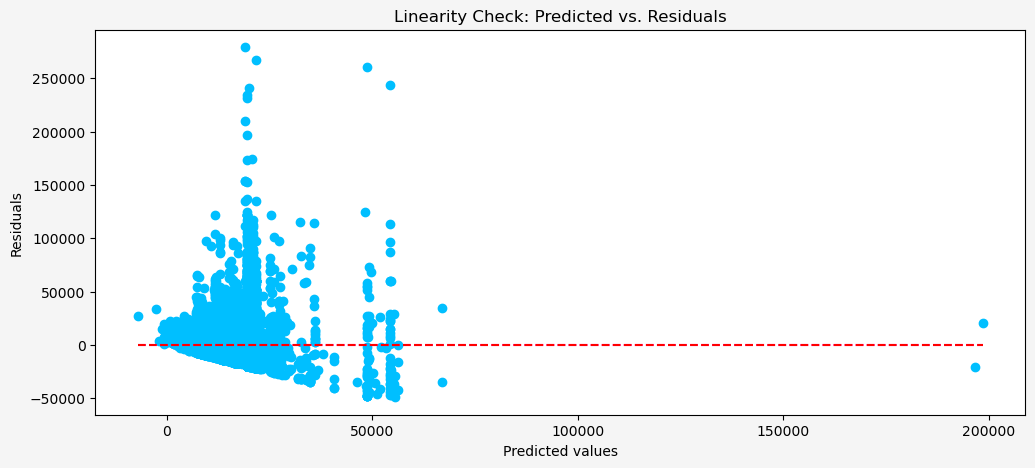

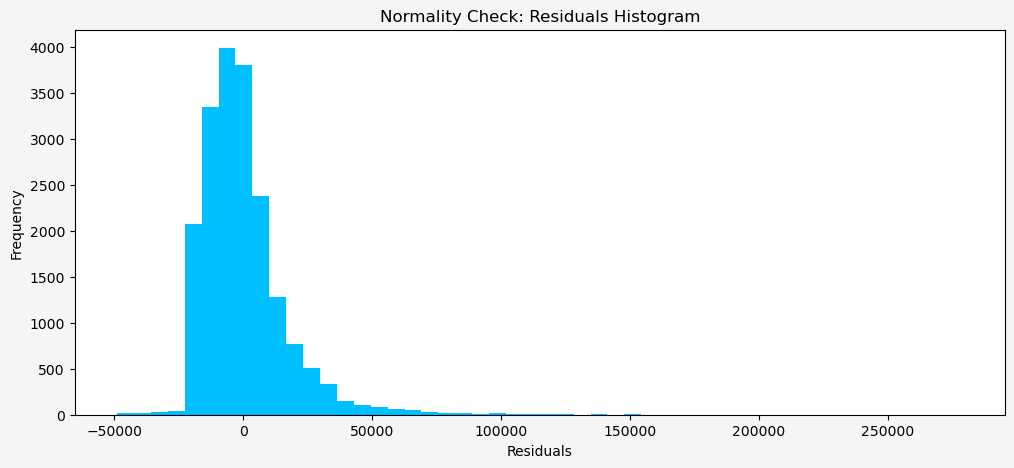

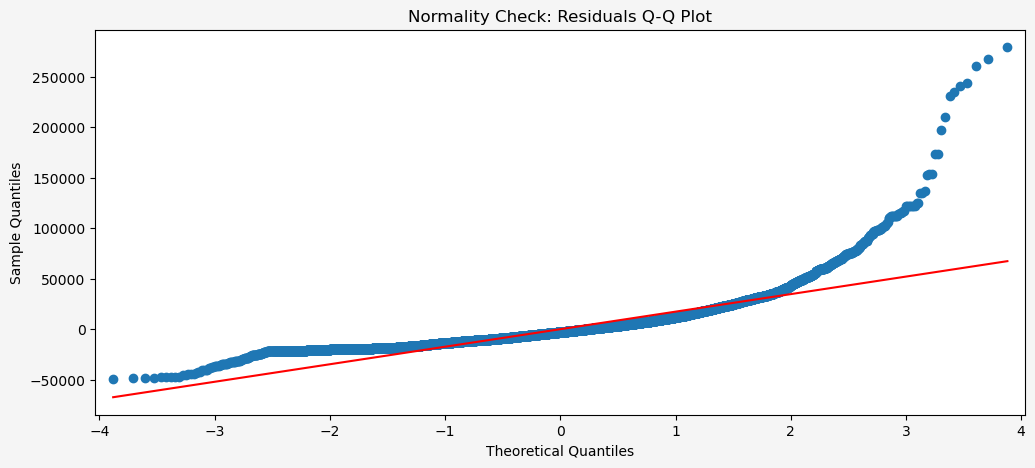

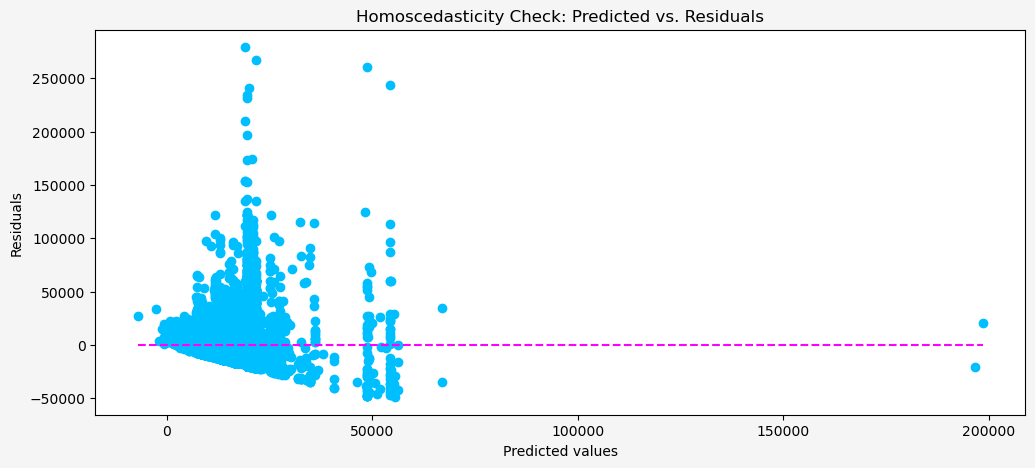

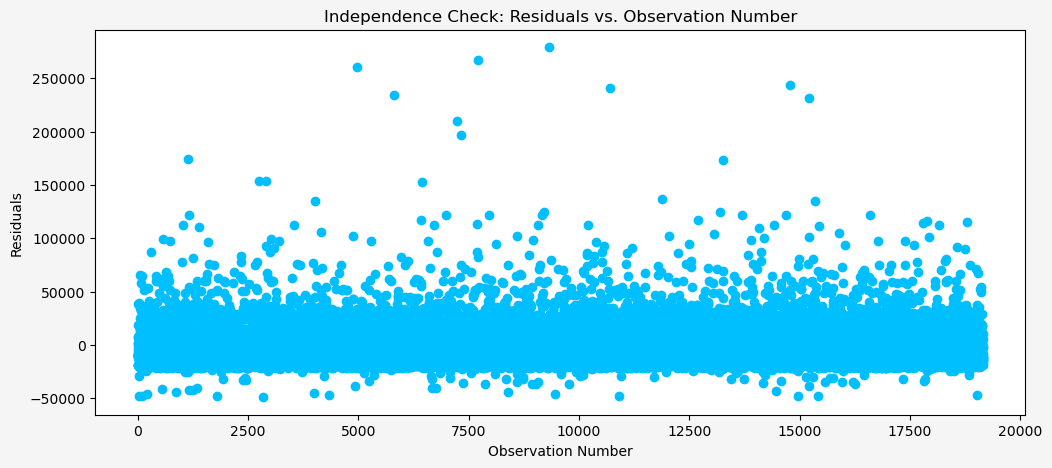

In [769]:
check_assumptions(ols_regression(X, y))

In [770]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


# Define a function named "train_test" that takes two input parameters, x and y.
def train_test(x,y):
    
    # Split the input data into training and testing sets using the "train_test_split" method from scikit-learn.
    # Use a test size of 0.3 and a random state of 42.

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
    
    # Create a LinearRegression object and train it using the training data.
    linreg = LinearRegression()
    linreg.fit(x_train, y_train)
    
    # Make predictions using the trained model for both the training and testing data.
    
    y_hat_train = linreg.predict(x_train)  # these are our prediction values
    y_hat_test = linreg.predict(x_test)
    
    # Print the R-squared value for the testing data.
    print('the r2_score:', r2_score(y_test, y_hat_test), '\n')
    
    # Calculate the mean absolute error and mean squared error for both the training and testing data.
    train_mae = mean_absolute_error(y_train, y_hat_train)
    test_mae = mean_absolute_error(y_test, y_hat_test)
    train_mse = mean_squared_error(y_train, y_hat_train)
    test_mse = mean_squared_error(y_test, y_hat_test)
    
    # Print the mean absolute error and mean squared error for both the training and testing data.
    print('train MAE:', train_mae)
    print('test MAE:', test_mae, '\n')
    print('train MSE:', train_mse)
    print('test MSE:', test_mse, '\n')
    
    # Print the root mean squared error for both the training and testing data.
    print('train root Mean squared Error: ', train_mse** 0.5)
    print('test root Mean squared Error: ', test_mse** 0.5, '\n')
    
    # Create a scatter plot comparing the predicted values to the actual values for both the training and testing data.
    plt.figure(figsize=(10, 6))

    plt.scatter(y_train, y_hat_train, alpha=0.5, color='#00BFFF', label='train')
    sns.regplot(x=y_train, y=y_hat_train, scatter=False, color='r', label='train fit')

    plt.scatter(y_test, y_hat_test, alpha=0.5, color='#FFC0CB', label='test')
    sns.regplot(x=y_test, y=y_hat_test, scatter=False, color='g', label='test fit')

    plt.scatter(x=y, y=y, color='maroon', alpha=0.3, label='actual')

    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title('Actual Price vs Predicted Price')

    plt.legend()
    plt.grid()
    plt.show()
    
    # Create a new LinearRegression object and train it using the training data.
    ml =LinearRegression()
    ml.fit(x_train,y_train)
    
    # Use the new model to make predictions for the testing data.
    y_pred = ml.predict(x_test)
    
    # Create a DataFrame containing the actual values, predicted values, difference, and percentage difference for the testing data.
    pred_y_df = pd.DataFrame({'Actual Values': y_test, 'Predicted Value' : y_pred, 'Difference' :abs(y_test-y_pred) , 'Percentage Difference' : abs((y_test-y_pred)/y_test*100)})
    
    # Calculate the mean percentage difference between the actual and predicted values for the testing data.
    mean_percentage = pred_y_df['Percentage Difference'].mean()
    
    # Print the mean percentage difference for the testing data.
    print('mean_diff:', mean_percentage)

    return pred_y_df[0:5]

the r2_score: 0.08940709764795562 

train MAE: 11582.548077428366
test MAE: 11742.218062143123 

train MSE: 300446557.864439
test MSE: 303628533.14094627 

train root Mean squared Error:  17333.39429726443
test root Mean squared Error:  17424.93997524658 



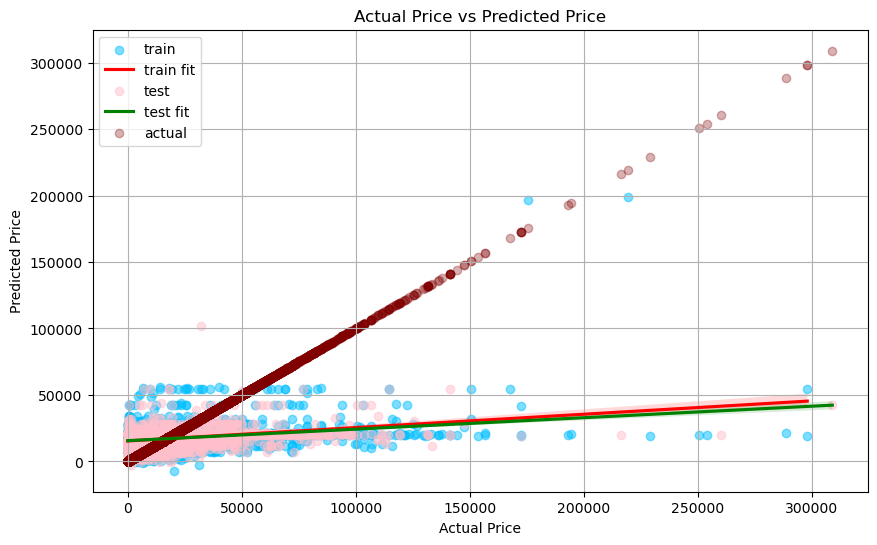

mean_diff: 2280.356144755993


,Actual Values,Predicted Value,Difference,Percentage Difference
ID,,,,
45681812,13172,8291.117545,4880.882455,37.054984
44943484,16621,7656.758760,8964.241240,53.933224
45813961,251,19571.777283,19320.777283,7697.520830
45787846,18503,7656.758760,10846.241240,58.618825
45621717,8938,19571.777283,10633.777283,118.972670


In [771]:
train_test(X, y)